# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=imperial" + "&q=" + city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gat
Processing Record 2 of Set 1 | balikpapan
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | severo-kurilsk
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | gravdal
Processing Record 10 of Set 1 | yakeshi
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | arlit
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | mahebourg
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | tomatlan
Processing Record 21 of Set 1 | staroshcherbinovskaya
Processing Record 22 of Set 1 | roald
Processing Record 23 of Set 1 | airai
Processing

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gat,31.6100,34.7642,60.40,61,13,5.57,IL,1680474700
1,balikpapan,-1.2675,116.8289,76.19,94,40,6.91,ID,1680474701
2,barrow,71.2906,-156.7887,6.82,78,100,11.50,US,1680474635
3,rikitea,-23.1203,-134.9692,80.35,81,29,16.08,PF,1680474701
4,hilo,19.7297,-155.0900,78.28,89,75,8.05,US,1680474701


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gat,31.6100,34.7642,60.40,61,13,5.57,IL,1680474700
1,balikpapan,-1.2675,116.8289,76.19,94,40,6.91,ID,1680474701
2,barrow,71.2906,-156.7887,6.82,78,100,11.50,US,1680474635
3,rikitea,-23.1203,-134.9692,80.35,81,29,16.08,PF,1680474701
4,hilo,19.7297,-155.0900,78.28,89,75,8.05,US,1680474701


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

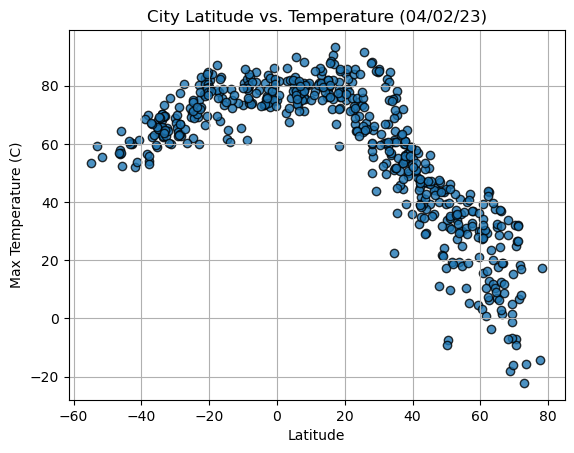

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.8)
# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

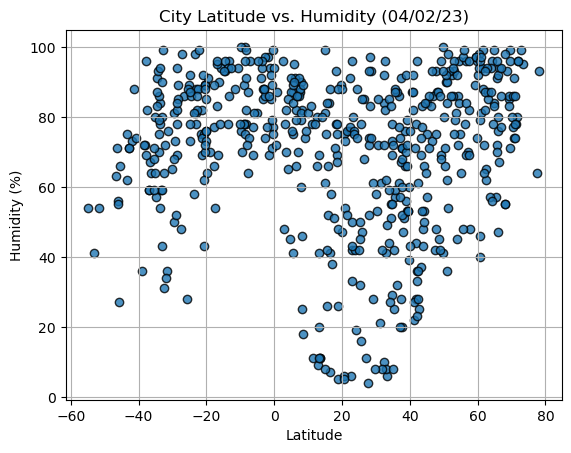

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

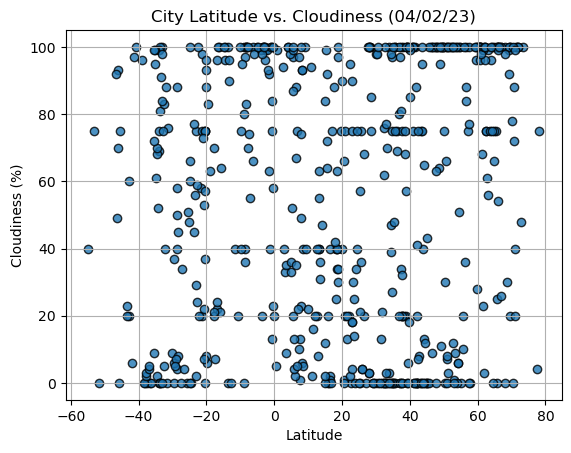

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

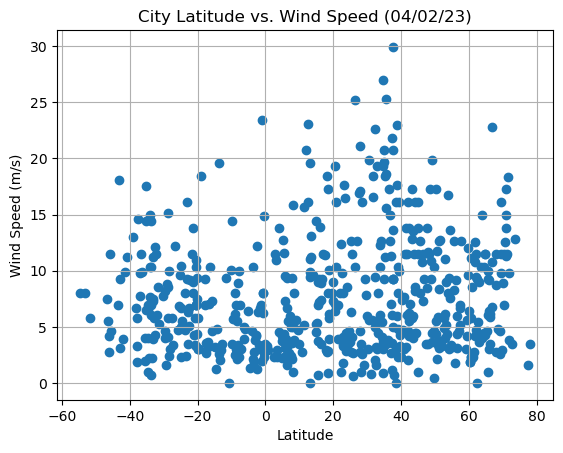

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gat,31.6100,34.7642,60.40,61,13,5.57,IL,1680474700
2,barrow,71.2906,-156.7887,6.82,78,100,11.50,US,1680474635
4,hilo,19.7297,-155.0900,78.28,89,75,8.05,US,1680474701
6,severo-kurilsk,50.6789,156.1250,31.46,90,100,11.74,RU,1680474657
8,gravdal,68.1214,13.5031,33.69,55,0,11.50,NO,1680474701


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,balikpapan,-1.2675,116.8289,76.19,94,40,6.91,ID,1680474701
3,rikitea,-23.1203,-134.9692,80.35,81,29,16.08,PF,1680474701
5,chuy,-33.6971,-53.4616,62.37,78,81,6.04,UY,1680474695
7,vaini,-21.2000,-175.2000,82.56,69,20,13.80,TO,1680474701
10,new norfolk,-42.7826,147.0587,59.92,71,60,3.11,AU,1680474701


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7929992013173149


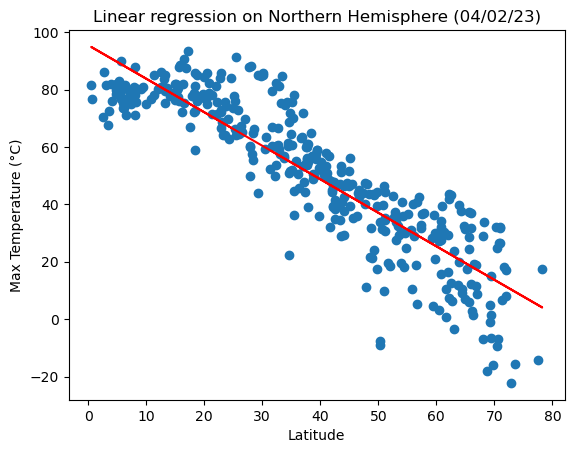

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Linear regression on Northern Hemisphere (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.5429263478871525


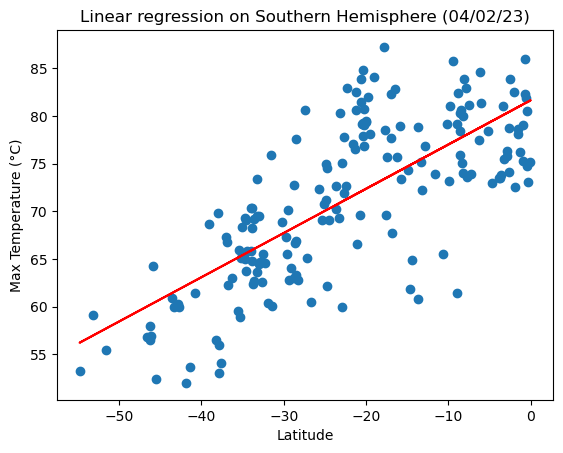

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Linear regression on Southern Hemisphere (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06883404525419705


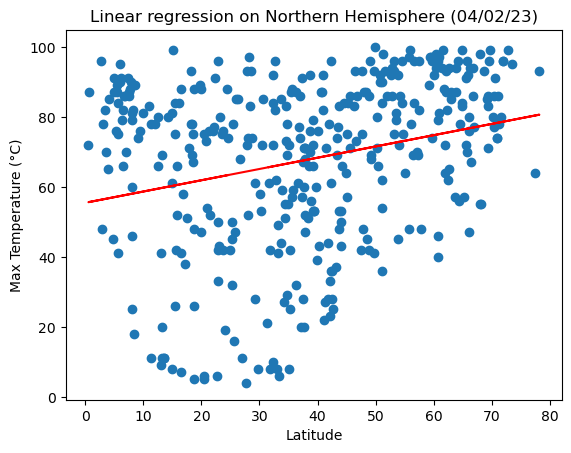

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Linear regression on Northern Hemisphere (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.2248048960620368


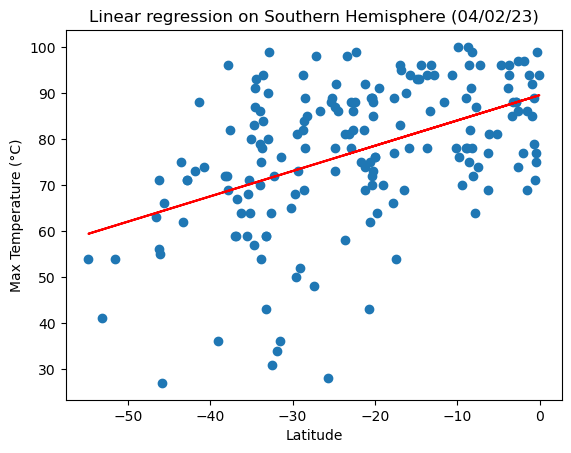

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Linear regression on Southern Hemisphere (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.06601404999953786


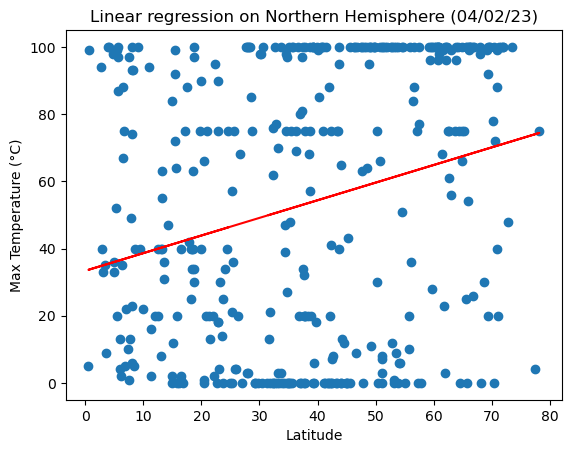

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Linear regression on Northern Hemisphere (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.1074605055084648


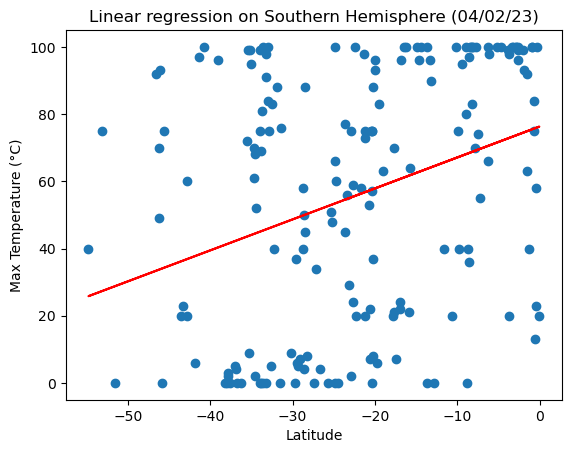

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Linear regression on Southern Hemisphere (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0007458604395065135


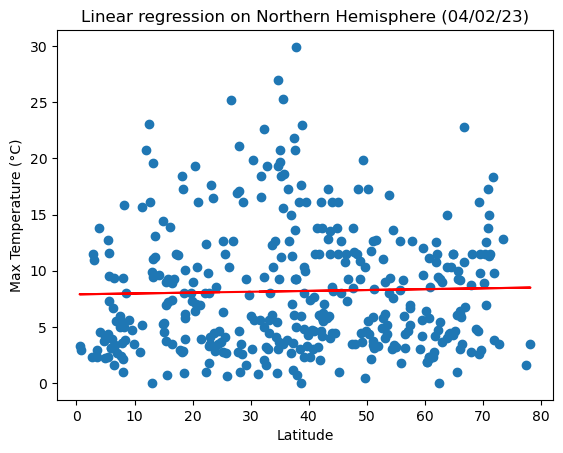

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df ['Lat']
y_values = northern_hemi_df ['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Linear regression on Northern Hemisphere (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.030387043157611194


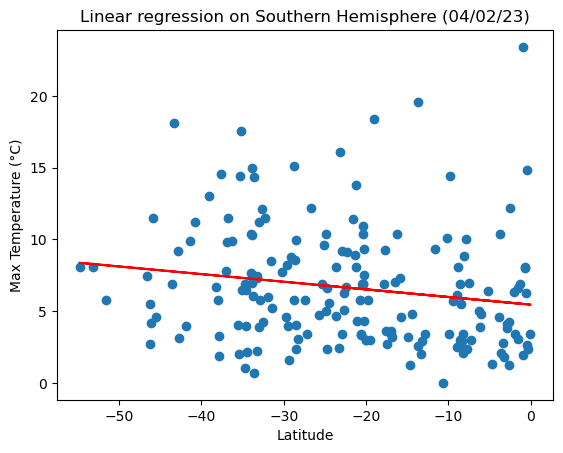

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df ['Lat']
y_values = southern_hemi_df ['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.title("Linear regression on Southern Hemisphere (%s)" % time.strftime("%x"))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (°C)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE